<a href="https://colab.research.google.com/github/rachit2005/custom-scit-learn-machine-learning-model/blob/main/custom_ml_models_in_scit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt

data = load_iris()
X, y = data.data, data.target
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class NearestCentroidClassifier(BaseEstimator , ClassifierMixin):
  def __init__(self):
    self.centroids_ = None
    self.classes_ = None

  def fit(self ,X,y):
    self.classes_ = np.unique(y)
    self.centroids_ = np.zeros((len(self.classes_) , X.shape[1])) # creates an numpy arrays of zeros with shape as (rows = classes , columns = features)

    for idx , cls in enumerate(self.classes_):
      self.centroids_[idx,:] = X[y==cls].mean(axis=0) # selects all data points from X that belong to the current class cls and assigns it to coressponding row(idx)

    return self

  def predict(self,X):
    distances = np.zeros((X.shape[0] , len(self.classes_)))

    for idx , centroid in enumerate(self.centroids_):
      # This is the core of the prediction. It calculates the Euclidean distance between each data point in X and the current centroid.
      distances[:,idx ] = np.linalg.norm(X-centroid , axis=1) #calculates the euclidian distance row wise and assigns the calculated distance to the corresponding columns

    return self.classes_[np.argmin(distances , axis=1)] # returns the prediction based on smallest distance

  def predict_proba(self,X):
    distances = np.zeros((X.shape[0] , len(self.classes_)))

    for idx , centroid in enumerate(self.centroids_):
      distances[:,idx] = np.linalg.norm(X-centroid , axis=1)

    inv_distances = 1/distances
    inv_dis_sum = np.sum(inv_distances , axis=1, keepdims=True)

    return inv_distances/inv_dis_sum

clf = NearestCentroidClassifier()
clf.fit(xtrain,ytrain)
clf.predict(xtest)
clf.predict_proba(xtest)

print(f"accuracy score --> {clf.score(xtest,ytest)*100} %")

In [ ]:
class KNNClassifier_by_me(BaseEstimator, ClassifierMixin):
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self  # Return self for method chaining

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)  # Vectorized distance calculation
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

    def predict_proba(self,X):
      X = np.array(X)
      probabilities = []

      for x in X:
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        probabilities.append(most_common / self.k)

      return np.array(probabilities)


# Train KNN model
knn = KNNClassifier_by_me(k=5)
knn.fit(xtrain, ytrain)
y_pred = knn.predict(xtest)
pred_prob = knn.predict_proba(xtest)

# Evaluate model
accuracy = knn.score(xtest, ytest)
print(f'KNN Model Accuracy: {accuracy * 100:.2f}%')
print(f'Predicted probabilities for first test sample: {pred_prob[0]}')


KNN Model Accuracy: 100.00%
Predicted probabilities for first test sample: 0.2


# Linear regression is used to predict continuous values, while logistic regression is used to predict categorical values

R² Score by my model--> 0.9374
R² Score by sklearn model--> 0.9374


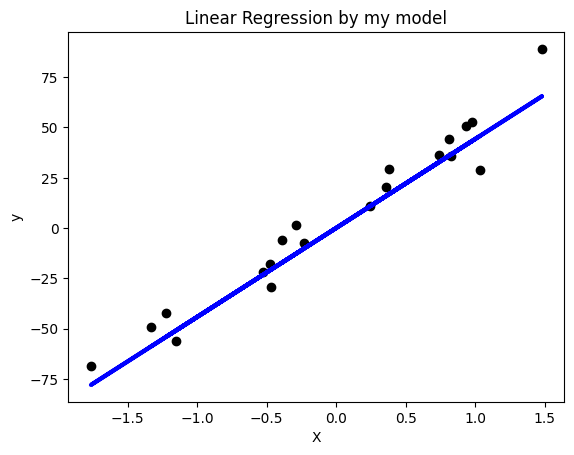

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

class CustomLinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate  # Gradient Descent learning rate
        self.n_iter = n_iter  # Number of iterations for training
        self.weights = None  # Coefficients
        self.bias = None  # Intercept

    def fit(self, X, y):
        """
        Fit the model using gradient descent.
        """
        # Convert X to numpy array
        X = np.array(X)
        y = np.array(y)

        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iter):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

        return self

    def predict(self, X):
        """
        Predict using the linear model.
        """
        X = np.array(X)
        return np.dot(X, self.weights) + self.bias

    def score(self, X, y):
        """
        Return R² score for model evaluation.
        """
        y_pred = self.predict(X)
        return r2_score(y, y_pred)

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the custom model
model_by_me = CustomLinearRegression(learning_rate=0.01, n_iter=1000)
model_by_me.fit(X_train, y_train)

model_by_sklearn = LinearRegression()
model_by_sklearn.fit(X_train, y_train)

# Predict and evaluate
y_pred = model_by_me.predict(X_test)
r2 = model_by_me.score(X_test, y_test)
print(f"R² Score by my model--> {r2:.4f}")

y_pred = model_by_sklearn.predict(X_test)
r2 = model_by_sklearn.score(X_test, y_test)
print(f"R² Score by sklearn model--> {r2:.4f}")


# plot graph of prediction vs actual
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression by my model')
plt.show()

# K-Means Clustering ML Model

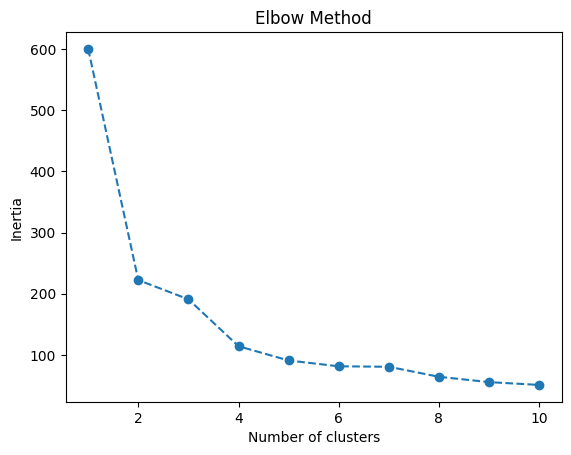

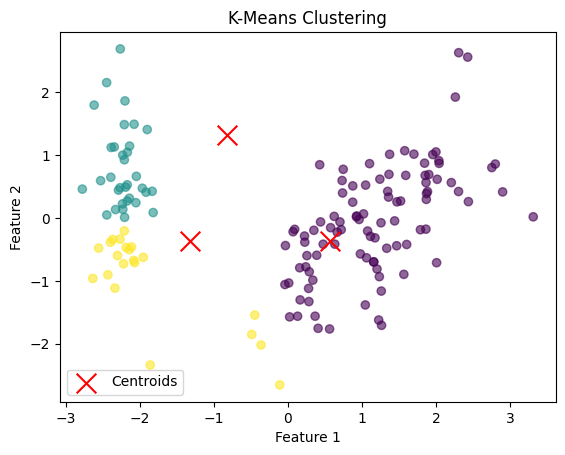

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

# finding k using the elbow method
inertial_values = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(X)
  inertial_values.append(kmeans.inertia_)

plt.plot(range(1,11),inertial_values,marker='o',linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# 🔹 Steps to Implement Custom K-Means
1. Initialize centroids randomly.
2. Assign points to the nearest cluster based on Euclidean distance.
3. Update centroids by computing the mean of assigned points.
4. Repeat until convergence (centroids don't change).


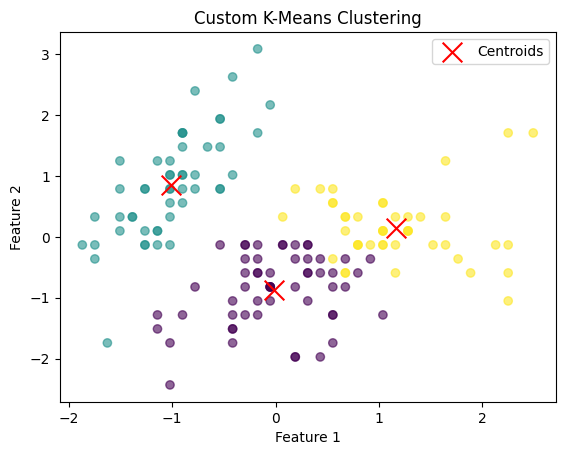

In [ ]:
 from sklearn.datasets import make_blobs

class KMeans_by_me(BaseEstimator):
  def __init__(self,n_clusters=3,max_iter=300 , tol = 1e-3):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.tol = tol
    self.centroids = None
    self.labels_ = None

  def fit(self , X):
    # randomly initialize centroids from data points
    np.random.seed(42)
    random_indices = np.random.choice(X.shape[0] , self.n_clusters , replace=False)
    self.centroids = X[random_indices]

    for _ in range(self.max_iter):
      # assigns each point to the nearest centroid
      distances = np.linalg.norm(X[: , np.newaxis] - self.centroids , axis=2)
      self.labels_ = np.argmin(distances , axis=1)

      # compute new centorids
      new_centroids = np.array([X[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])

      # check for convergence(if centroids dont change much)
      if np.linalg.norm(self.centroids - new_centroids) < self.tol:
        break

      self.centroids = new_centroids

  def predict(self,X):
    distances = np.linalg.norm(X[: , np.newaxis] - self.centroids , axis=2)
    return np.argmin(distances , axis=1)


k_means_by_me = KMeans_by_me(n_clusters=3)
k_means_by_me.fit(X)

labels = k_means_by_me.labels_

# plotting the graphs
plt.scatter(X[:,0] , X[:,1] , c=labels ,cmap="viridis" , alpha = 0.6)
plt.scatter(k_means_by_me.centroids[:, 0], k_means_by_me.centroids[:, 1], marker='x', s=200, color='red', label='Centroids')
plt.title('Custom K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()